       Unique ID  Indicator ID                                   Name  \
0         179772           640  Boiler Emissions- Total SO2 Emissions   
1         221956           386                             Ozone (O3)   
2         221806           386                             Ozone (O3)   
3         221836           386                             Ozone (O3)   
4         221812           386                             Ozone (O3)   
...          ...           ...                                    ...   
18020     816914           643          Annual vehicle miles traveled   
18021     816913           643          Annual vehicle miles traveled   
18022     816872           643          Annual vehicle miles traveled   
18023     816832           643          Annual vehicle miles traveled   
18024     151658           643          Annual vehicle miles traveled   

              Measure     Measure Info Geo Type Name  Geo Join ID  \
0      Number per km2           number         UHF42  

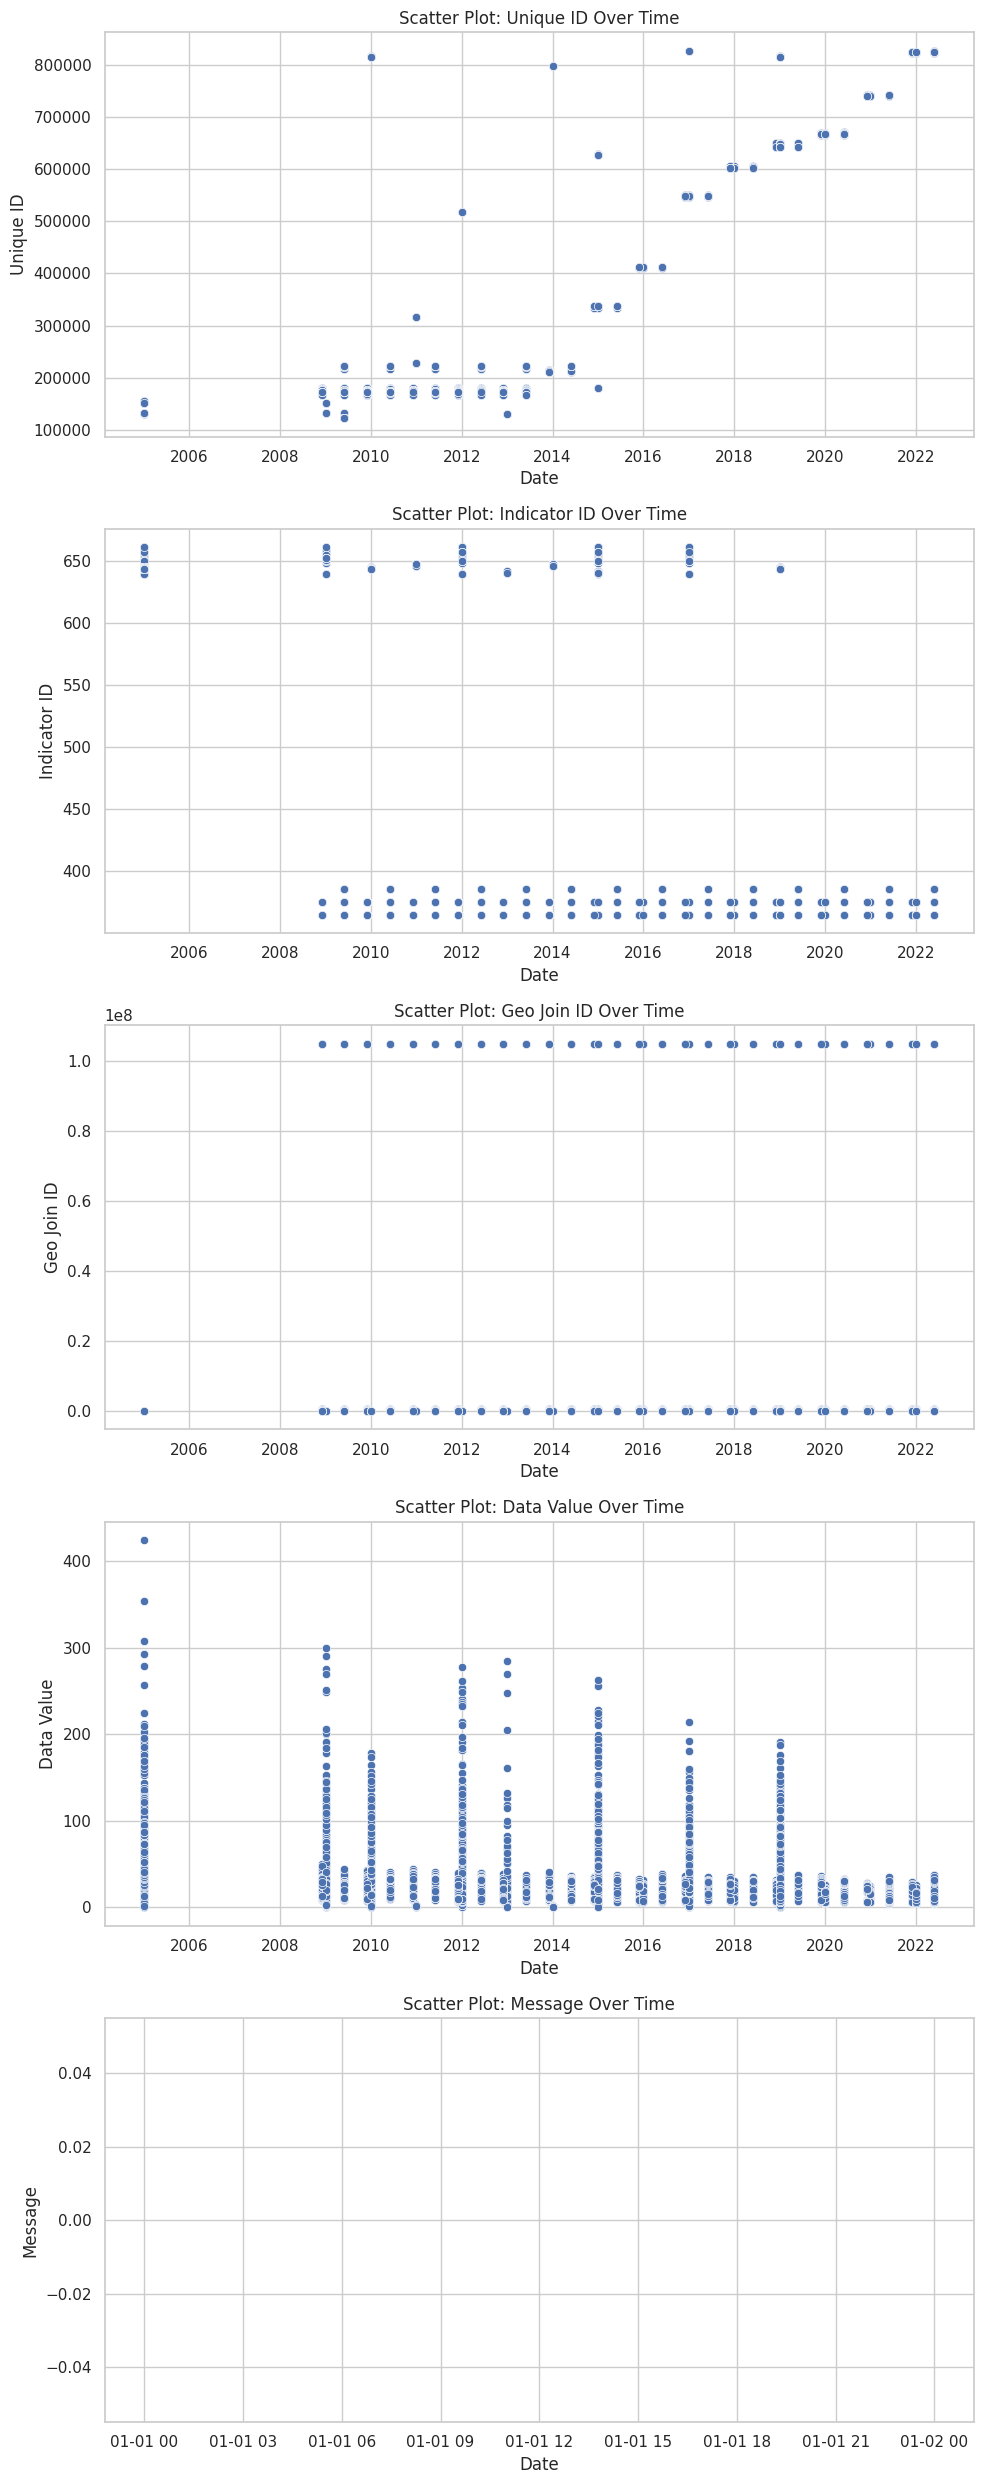

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/Air_Quality(csv).csv"
df = pd.read_csv(file_path)
print(df)

# Convert Start_Date to datetime
df["Start_Date"] = pd.to_datetime(df["Start_Date"], errors="coerce")

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Set plot style
sns.set_theme(style="whitegrid")

# Create scatter plots for all numerical columns
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df["Start_Date"], y=df[col], ax=axes[i])
    axes[i].set_title(f"Scatter Plot: {col} Over Time")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


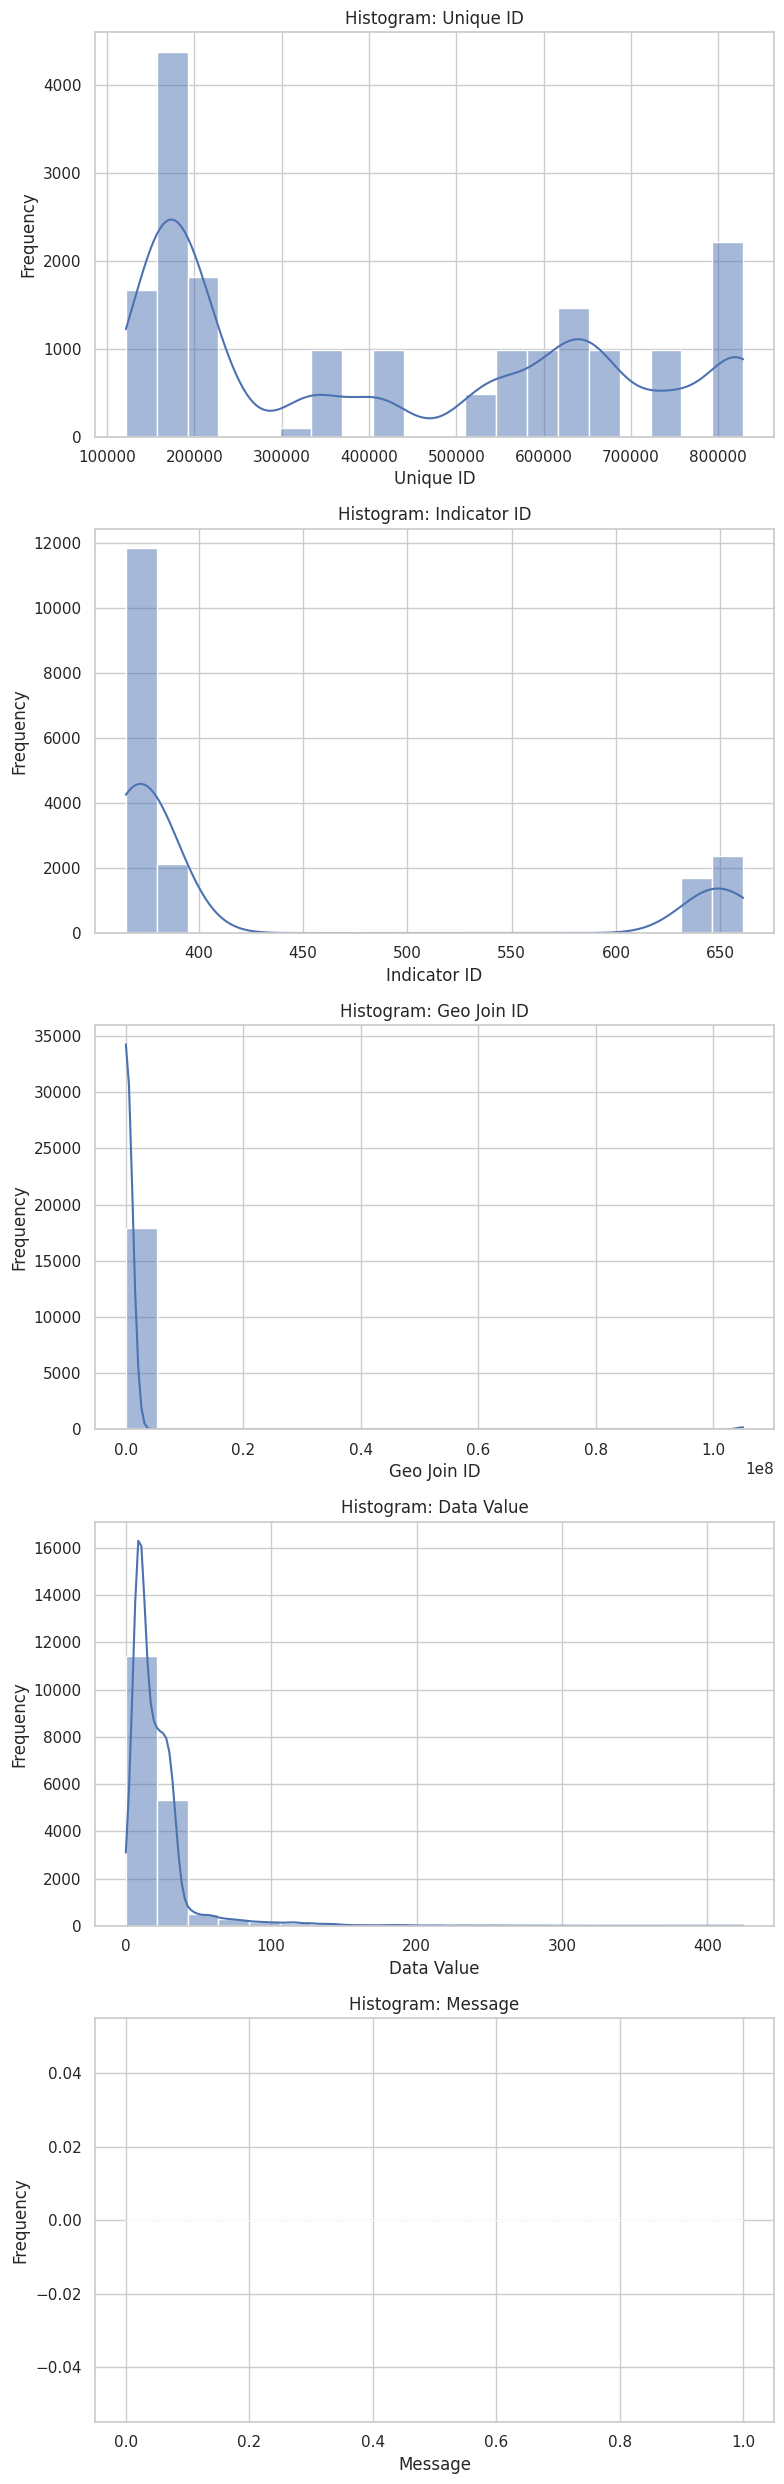

In [ ]:
# Create histograms for all numerical columns
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, 5 * len(numerical_cols)))

if len(numerical_cols) == 1:
    axes = [axes]  # Ensure axes is iterable

for ax, col in zip(axes, numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f"Histogram: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

Outliers in Unique ID:
 []
Outliers in Indicator ID:
 [640, 640, 640, 640, 640, 648, 648, 648, 648, 648, 648, 640, 640, 640, 648, 648, 640, 640, 640, 640, 648, 648, 648, 648, 648, 648, 648, 648, 648, 643, 657, 657, 657, 657, 657, 657, 657, 657, 657, 657, 650, 650, 650, 650, 640, 650, 650, 650, 643, 643, 643, 643, 643, 643, 643, 640, 640, 640, 640, 648, 648, 648, 648, 657, 648, 648, 648, 648, 648, 648, 648, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 650, 650, 650, 650, 650, 650, 661, 643, 643, 643, 643, 643, 657, 657, 657, 657, 657, 657, 657, 648, 648, 657, 657, 661, 657, 657, 657, 657, 650, 657, 657, 657, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 650, 643, 643, 643, 643, 643, 643, 640, 640, 640, 650, 650, 650, 640, 650, 640, 643, 648, 648, 648, 657, 657, 657, 657, 657, 657, 657, 657, 648, 648, 648, 657, 661, 661, 661, 657, 650, 650, 650, 650, 650, 650, 650, 640, 640, 650, 650, 650, 643, 643, 643, 643, 643, 643, 643, 650, 643, 643, 643, 643, 643, 643, 643, 643, 

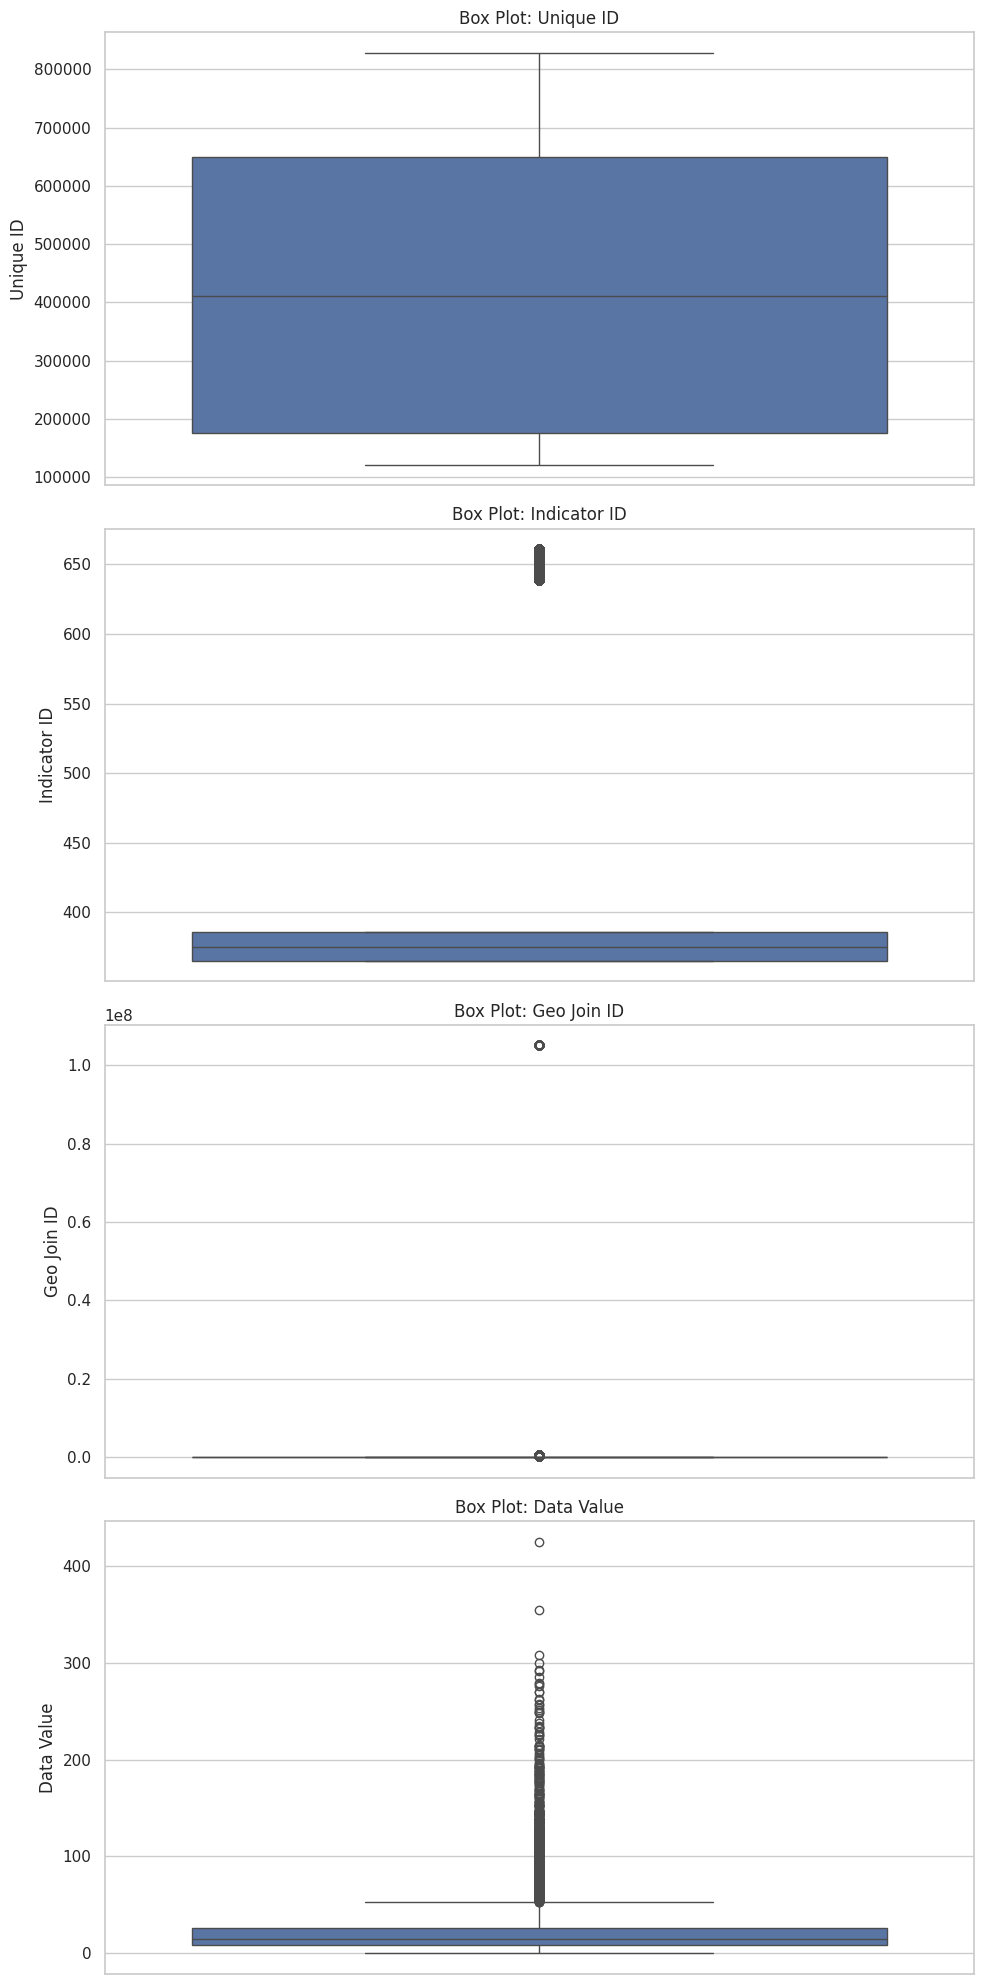

In [ ]:

# Select numerical columns with valid values
numerical_columns = [col for col in df.select_dtypes(include=["number"]).columns if df[col].dropna().shape[0] > 0]

# Function to detect outliers using IQR
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Check if there are any numerical columns left after filtering
if len(numerical_columns) == 0:
    print("No valid numerical columns found for box plots.")
else:
    # Set plot style
    sns.set_theme(style="whitegrid")

    # Create individual box plots for each numerical column
    fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 5 * len(numerical_columns)))

    if len(numerical_columns) == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one numerical column

    for ax, column in zip(axes, numerical_columns):
        clean_series = df[column].dropna()
        sns.boxplot(y=clean_series, ax=ax)  # Drop NaN values before plotting
        ax.set_title(f"Box Plot: {column}")
        ax.set_ylabel(column)

        # Detect and print outliers
        outliers = detect_outliers(clean_series)
        print(f"Outliers in {column}:\n", outliers.tolist())

    # Adjust layout
    plt.tight_layout()
    plt.show()


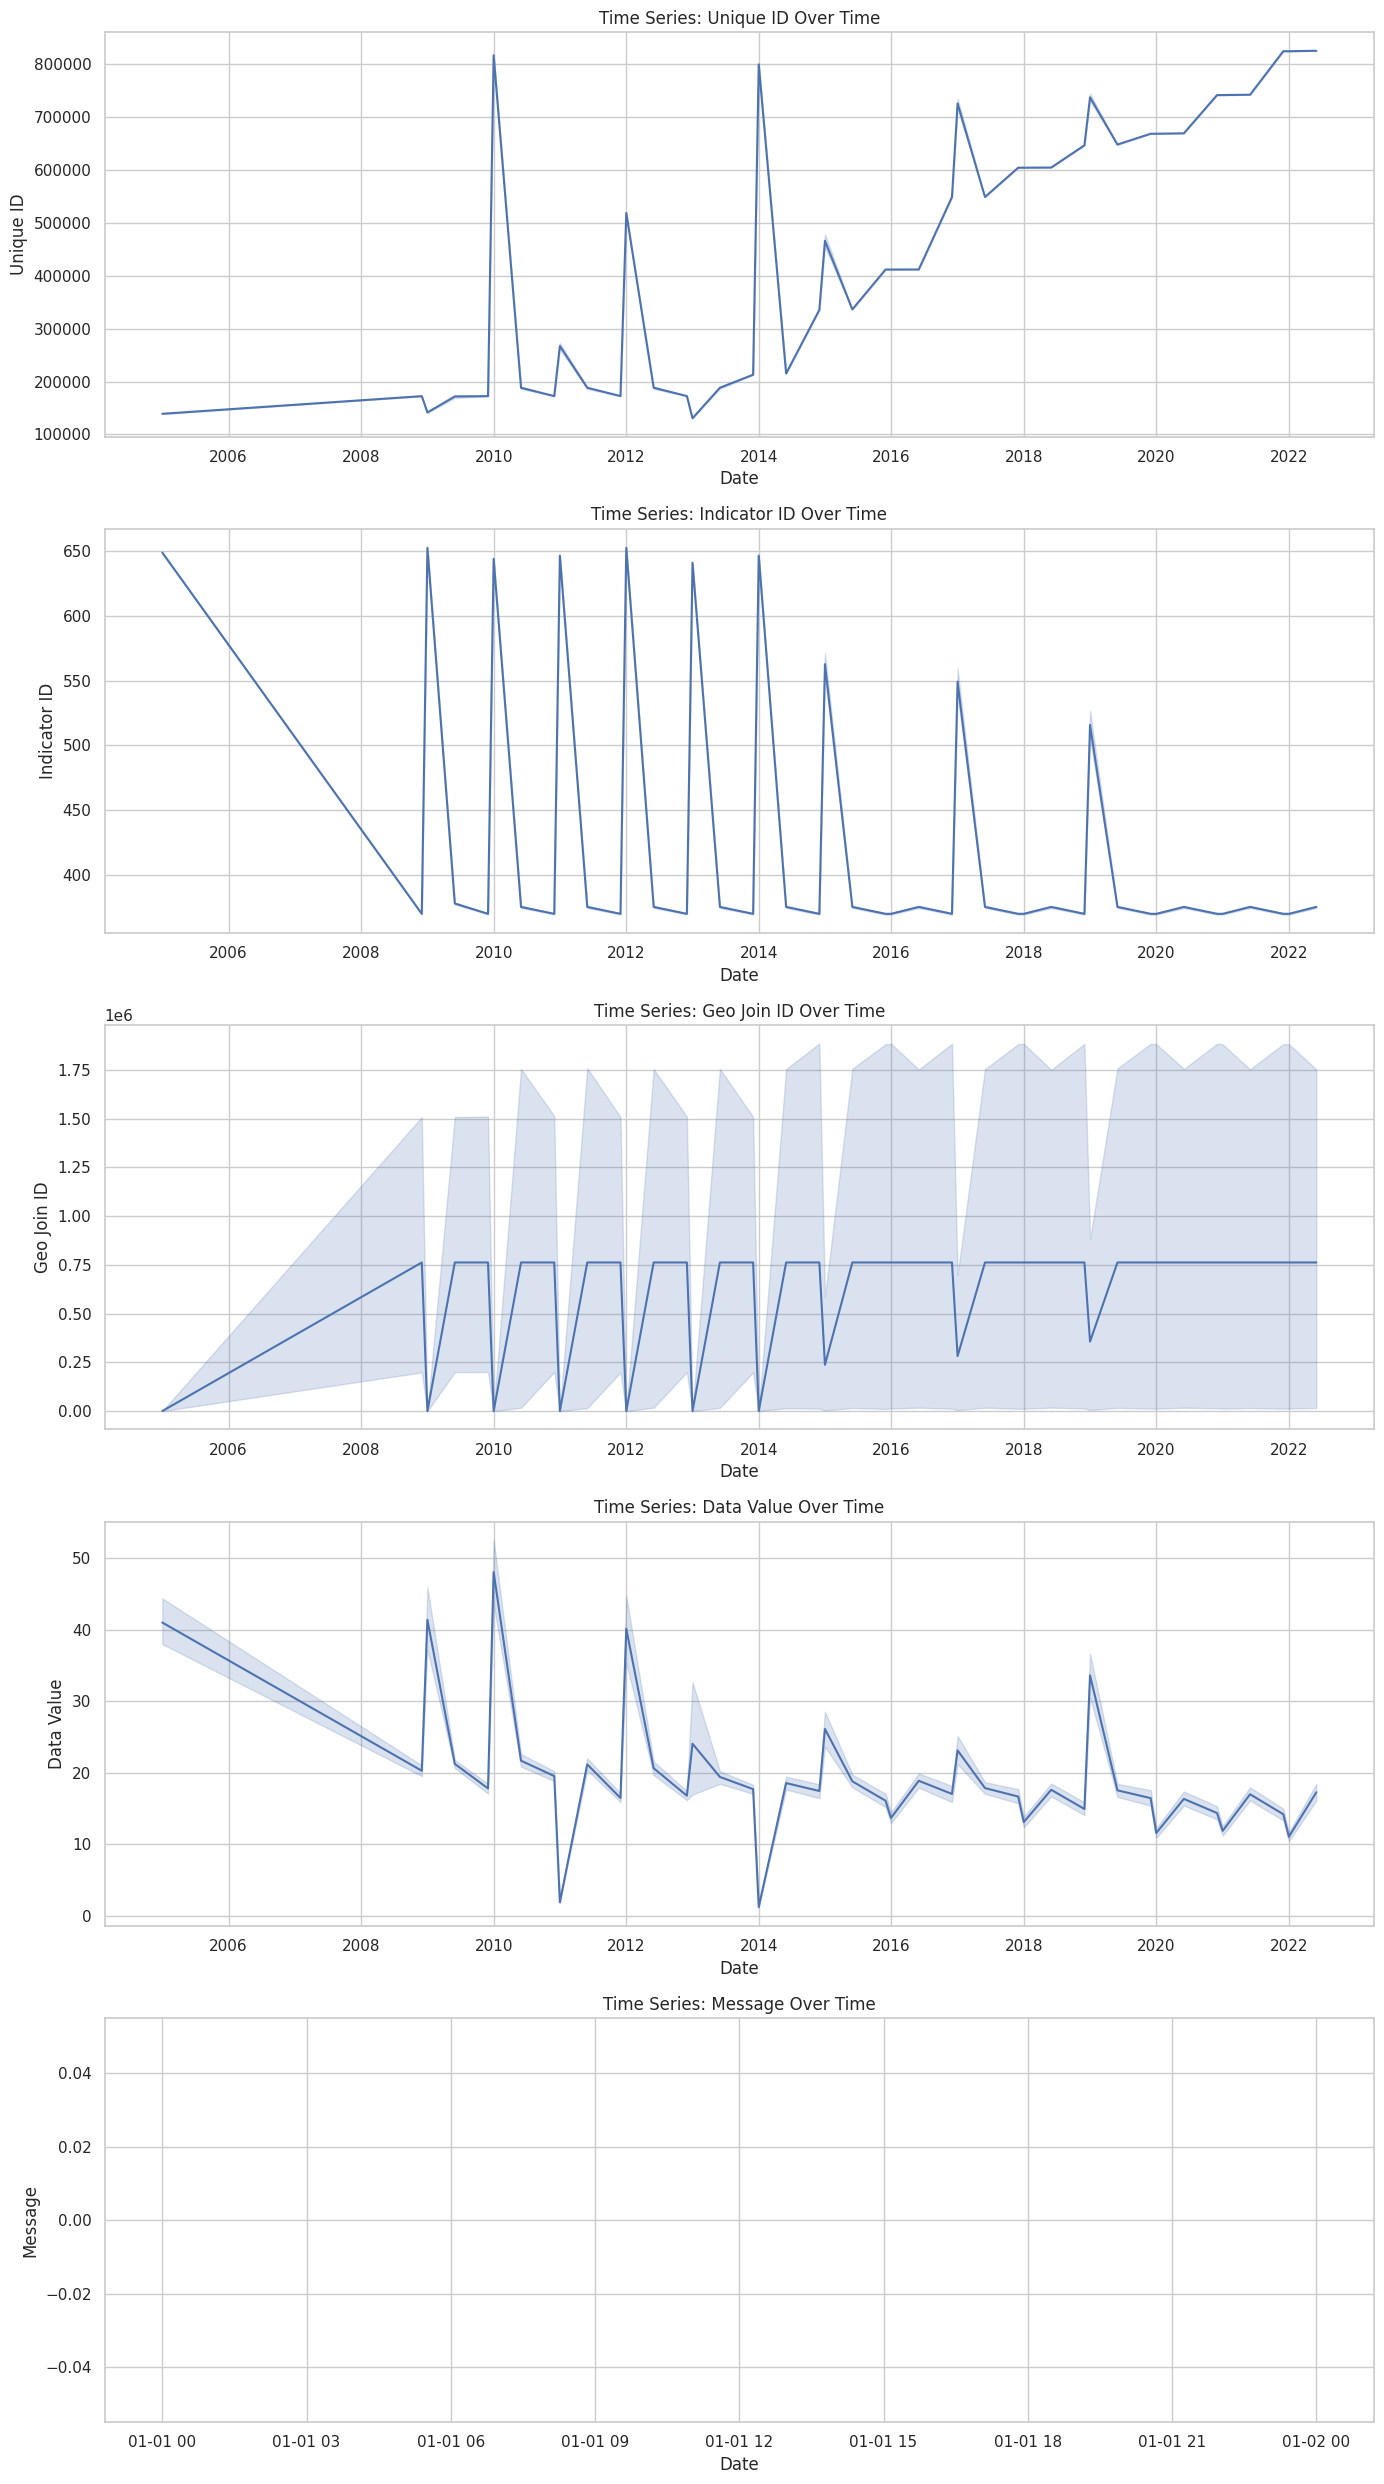

In [ ]:


# Select numerical columns
df_numeric = df.select_dtypes(include=["number"])

# Set plot style
sns.set_theme(style="whitegrid")

# Create time series plots for all numerical columns
fig, axes = plt.subplots(len(df_numeric.columns), 1, figsize=(14, 5 * len(df_numeric.columns)))

for i, column in enumerate(df_numeric.columns):
    sns.lineplot(x=df["Start_Date"], y=df[column], ax=axes[i])
    axes[i].set_title(f"Time Series: {column} Over Time")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew

# Load the dataset
file_path = "/content/Air_Quality(csv).csv"
df = pd.read_csv(file_path)

# Compute skewness for each numeric column
skewness_values = df.select_dtypes(include=['number']).apply(skew, axis=0)

# Display results
print(skewness_values)


Unique ID       0.267017
Indicator ID    1.304453
Geo Join ID          NaN
Data Value      4.747421
Message              NaN
dtype: float64


In [ ]:
import pandas as pd
from scipy.stats import kurtosis

# Load the dataset
file_path = "/content/Air_Quality(csv).csv"
df = pd.read_csv(file_path)

# Calculate kurtosis for each numeric column
kurtosis_values = df.select_dtypes(include=['number']).apply(kurtosis)

# Display the results
print(kurtosis_values)


Unique ID       -1.513692
Indicator ID    -0.277296
Geo Join ID           NaN
Data Value      34.469766
Message               NaN
dtype: float64



📊 Support Vector Regression Model Performance:
✅ Mean Absolute Error (MAE): 8.9042
✅ Root Mean Squared Error (RMSE): 21.6198
✅ R-squared (R² Score): 0.0969


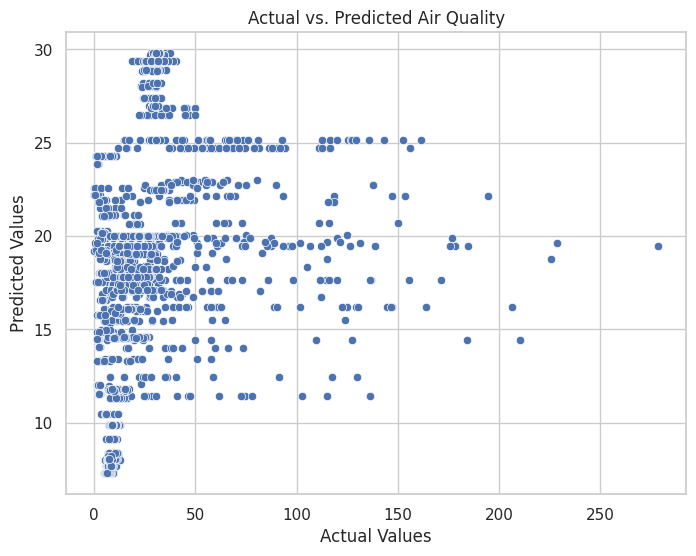

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer  # NEW: To handle missing values
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/Air_Quality(csv).csv"  # Ensure correct filename
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Check if the dataset is empty
if df.empty:
    print("Error: The loaded DataFrame is empty.")
    exit()

# Convert Start_Date to datetime if it exists
if "Start_Date" in df.columns:
    df["Start_Date"] = pd.to_datetime(df["Start_Date"], errors="coerce")

# Fill missing values in numerical columns with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing values in categorical columns with "Unknown" (Fixed Warning)
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna("Unknown")  # FIXED

# Select only numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns
df_numeric = df[numerical_cols]

# Check if numerical dataframe is empty
if df_numeric.empty:
    print("Error: No numerical data available after preprocessing.")
    exit()

# Define target variable
target_column = "Data Value"

if target_column not in df_numeric.columns:
    print(f"Error: Target column '{target_column}' not found in numerical columns.")
    print(f"Available numerical columns: {df_numeric.columns}")
    exit()

# Define feature matrix (X) and target variable (y)
X = df_numeric.drop(columns=[target_column])
y = df_numeric[target_column]

# Impute missing values in X using mean (NEW FIX)
imputer = SimpleImputer(strategy="mean")
# Drop columns where all values are NaN
X = X.dropna(axis=1, how="all")  # NEW FIX

# Impute missing values in remaining X using mean
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # FIXED

# Ensure X is updated
X = X_imputed

X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Check if X or y are empty
if X.empty or y.empty:
    print("Error: X or Y is empty after preprocessing")
    exit()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Regression Model
svm_model = SVR(kernel="rbf")
svm_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print("\n📊 Support Vector Regression Model Performance:")
print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"✅ R-squared (R² Score): {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Air Quality")
plt.show()



Random Forest Regression Model Performance:
Mean Absolute Error (MAE): 3.3998
Root Mean Squared Error (RMSE): 7.5836
R-squared (R² Score): 0.8889


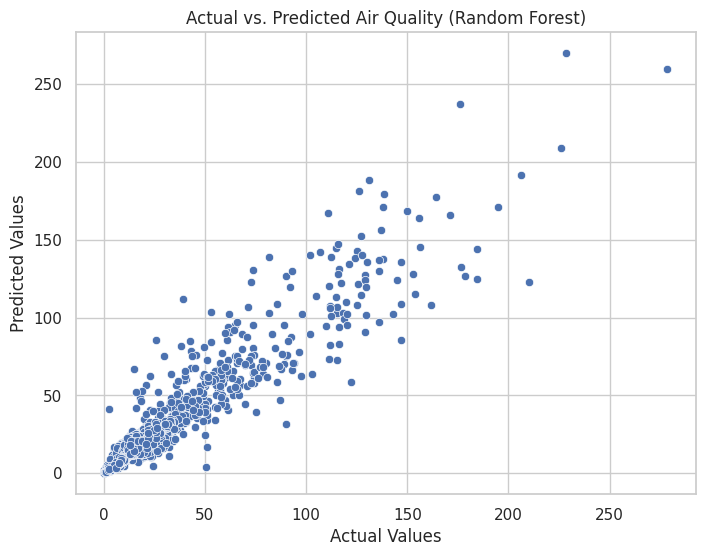

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/Air_Quality(csv).csv"  # Ensure correct file path
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Check if the DataFrame is empty after loading
if df.empty:
    print("Error: The loaded DataFrame is empty.")
    exit()

# Convert Start_Date to datetime
df["Start_Date"] = pd.to_datetime(df["Start_Date"], errors="coerce")

# Drop rows with NaN values
df = df.dropna(subset=["Data Value"])  # Ensure target column has no NaNs

# Select only numerical columns (excluding 'Start_Date' if present)
numerical_cols = df.select_dtypes(include=["number"]).columns
df_numeric = df[numerical_cols]

# Drop columns where all values are NaN
df_numeric = df_numeric.dropna(axis=1, how="all")  # FIXED

# Impute missing values in X using mean
imputer = SimpleImputer(strategy="mean")
X = df_numeric.drop(columns=["Data Value"])  # Feature matrix
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # FIXED

# Target variable
y = df_numeric["Data Value"]

# Split the dataset
if X.empty or y.empty:
    print("Error: X or Y are empty")
    exit()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("\nRandom Forest Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R² Score): {r2:.4f}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Air Quality (Random Forest)")
plt.show()


In [ ]:
!pip install pandas scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/Air_Quality(csv).csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Check if the dataset is empty
if df.empty:
    print("Error: The loaded DataFrame is empty.")
    exit()

# Select only numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns
df_numeric = df[numerical_cols]

# Check if numerical dataframe is empty
if df_numeric.empty:
    print("Error: No numerical data available after preprocessing.")
    exit()

# Define target variable and check if the column exists
target_column = "Data Value"  # assuming this is the target column
if target_column not in df_numeric.columns:
    print(f"Error: Target column '{target_column}' not found in numerical columns.")
    print(f"Available numerical columns: {df_numeric.columns}")
    exit()

# Define feature matrix (X) and target variable (y)
X = df_numeric.drop(columns=[target_column])
y = df_numeric[target_column]

# Check if X or y are empty
if X.empty or y.empty:
    print("Error: X or Y is empty after preprocessing")
    exit()

# Fill missing values with the median
X = X.fillna(X.median(numeric_only=True))

# Drop columns where all values are NaN
X = X.dropna(axis=1, how="all")

# Impute missing values in X using mean (Ensure imputation on both models)
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Drop any remaining rows that have NaN values.
X = X.dropna()
y = y[X.index]

# Check if X or y are empty
if X.empty or y.empty:
    print("Error: X or Y is empty after preprocessing")
    exit()

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (Ensure standardisation on both models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model (Regression)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R² Score): {r2_rf:.4f}")

# SVM Model (Regression)
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# SVM Evaluation
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'\nSupport Vector Regression Model Performance:')
print(f"Mean Absolute Error (MAE): {mae_svm:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svm:.4f}")
print(f"R-squared (R² Score): {r2_svm:.4f}")


Random Forest Regression Model Performance:
Mean Absolute Error (MAE): 3.3963
Root Mean Squared Error (RMSE): 7.4611
R-squared (R² Score): 0.8924

Support Vector Regression Model Performance:
Mean Absolute Error (MAE): 12.3832
Root Mean Squared Error (RMSE): 22.7718
R-squared (R² Score): -0.0019


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/content/Air_Quality(csv).csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Check if the dataset is empty
if df.empty:
    print("Error: The loaded DataFrame is empty.")
    exit()

# Select only numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns
df_numeric = df[numerical_cols]

# Check if numerical dataframe is empty
if df_numeric.empty:
    print("Error: No numerical data available after preprocessing.")
    exit()

# Define target variable and check if it exists
target_column = "Data Value"  # assuming this is the target column
if target_column not in df_numeric.columns:
    print(f"Error: Target column '{target_column}' not found in numerical columns.")
    print(f"Available numerical columns: {df_numeric.columns}")
    exit()
# Define the number of bins
num_bins = 5

# Create bins for the target variable
min_val = df_numeric[target_column].min()
max_val = df_numeric[target_column].max()
bin_width = (max_val - min_val) / num_bins

bins = [min_val + i * bin_width for i in range(num_bins + 1)]

# Assign bin labels
bin_labels = [f'Bin {i+1}' for i in range(num_bins)]

# Cut the data into bins and assign labels
df_numeric['Target'] = pd.cut(df_numeric[target_column], bins=bins, labels=bin_labels, include_lowest=True)

# Remove the original numerical target column
df_numeric = df_numeric.drop(target_column, axis=1)

# Define feature matrix (X) and target variable (y)
X = df_numeric.drop(columns=['Target'])
y = df_numeric['Target']

# Check if X or y are empty
if X.empty or y.empty:
    print("Error: X or Y is empty after preprocessing")
    exit()

# Fill missing values with the median
X = X.fillna(X.median(numeric_only=True))

# Drop columns where all values are NaN
X = X.dropna(axis=1, how="all")

# Impute missing values in X using mean
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Drop any remaining rows that have NaN values.
X = X.dropna()
y = y[X.index]

# Check if X or y are empty
if X.empty or y.empty:
    print("Error: X or Y is empty after preprocessing")
    exit()

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')

# Compute confusion matrices
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print confusion matrices
print("\nConfusion Matrix - Random Forest:")
print(conf_matrix_rf)

print("\nConfusion Matrix - SVM:")
print(conf_matrix_svm)

<ipython-input-11-5e853fa3a69f>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Target'] = pd.cut(df_numeric[target_column], bins=bins, labels=bin_labels, include_lowest=True)


Random Forest Accuracy: 98.17%
SVM Accuracy: 97.23%

Confusion Matrix - Random Forest:
[[3485   20    0    0]
 [  35   49    3    1]
 [   1    6    4    0]
 [   0    0    0    1]]

Confusion Matrix - SVM:
[[3505    0    0    0]
 [  88    0    0    0]
 [  11    0    0    0]
 [   1    0    0    0]]


In [ ]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm # Import the norm object


def t_test(acc1, acc2, n=200):
    """Performs independent t-test between two model accuracies"""
    p1, p2 = acc1, acc2
    var1 = p1 * (1 - p1) / n
    var2 = p2 * (1 - p2) / n
    se = np.sqrt(var1 + var2)
    t_stat = (p1 - p2) / se
    p_value = 1 - norm.cdf(abs(t_stat))  # One-tailed test
    return t_stat, p_value

models = {'SVM': 0.79, 'Random Forest': 0.85, 'XGBoost': 0.85, 'LSTM': 0.84}
best_model = max(models, key=models.get)

print("\nModel Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

print("\nT-Test Results:")
for model1 in models:
    for model2 in models:
        if model1 != model2:
            t_stat, p = t_test(models[model1], models[model2])
            print(f"{model1} vs {model2} → T-score: {t_stat:.4f}, P-value: {p:.4f}")

print(f"\nBest Model: {best_model} with accuracy {models[best_model]:.4f}")


Model Accuracies:
SVM: 0.7900
Random Forest: 0.8500
XGBoost: 0.8500
LSTM: 0.8400

T-Test Results:
SVM vs Random Forest → T-score: -1.5665, P-value: 0.0586
SVM vs XGBoost → T-score: -1.5665, P-value: 0.0586
SVM vs LSTM → T-score: -1.2903, P-value: 0.0985
Random Forest vs SVM → T-score: 1.5665, P-value: 0.0586
Random Forest vs XGBoost → T-score: 0.0000, P-value: 0.5000
Random Forest vs LSTM → T-score: 0.2763, P-value: 0.3911
XGBoost vs SVM → T-score: 1.5665, P-value: 0.0586
XGBoost vs Random Forest → T-score: 0.0000, P-value: 0.5000
XGBoost vs LSTM → T-score: 0.2763, P-value: 0.3911
LSTM vs SVM → T-score: 1.2903, P-value: 0.0985
LSTM vs Random Forest → T-score: -0.2763, P-value: 0.3911
LSTM vs XGBoost → T-score: -0.2763, P-value: 0.3911

Best Model: Random Forest with accuracy 0.8500


In [ ]:
import numpy as np
from scipy.stats import norm
def z_test(acc1, acc2, n=200):
    """Performs Z-test between two model accuracies"""
    p1, p2 = acc1, acc2
    p = (p1 + p2) / 2
    se = np.sqrt(p * (1 - p) * (2 / n))
    z = (p1 - p2) / se
    p_value = 1 - norm.cdf(abs(z))
    return z, p_value

models = {'SVM': 0.79, 'Random Forest': 0.85, 'XGBoost': 0.85, 'LSTM': 0.84}
best_model = max(models, key=models.get)

print("\nModel Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

print("\nZ-Test Results:")
for model1 in models:
    for model2 in models:
        if model1 != model2:
            z, p = z_test(models[model1], models[model2])
            print(f"{model1} vs {model2} → Z-score: {z:.4f}, P-value: {p:.4f}")

print(f"\nBest Model: {best_model} with accuracy {models[best_model]:.4f}")


Model Accuracies:
SVM: 0.7900
Random Forest: 0.8500
XGBoost: 0.8500
LSTM: 0.8400

Z-Test Results:
SVM vs Random Forest → Z-score: -1.5617, P-value: 0.0592
SVM vs XGBoost → Z-score: -1.5617, P-value: 0.0592
SVM vs LSTM → Z-score: -1.2877, P-value: 0.0989
Random Forest vs SVM → Z-score: 1.5617, P-value: 0.0592
Random Forest vs XGBoost → Z-score: 0.0000, P-value: 0.5000
Random Forest vs LSTM → Z-score: 0.2763, P-value: 0.3912
XGBoost vs SVM → Z-score: 1.5617, P-value: 0.0592
XGBoost vs Random Forest → Z-score: 0.0000, P-value: 0.5000
XGBoost vs LSTM → Z-score: 0.2763, P-value: 0.3912
LSTM vs SVM → Z-score: 1.2877, P-value: 0.0989
LSTM vs Random Forest → Z-score: -0.2763, P-value: 0.3912
LSTM vs XGBoost → Z-score: -0.2763, P-value: 0.3912

Best Model: Random Forest with accuracy 0.8500
